# Week 5: Probability Distributions

In [ ]:
# Loading the libraries
import numpy as np
import sympy as sy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Days 2 and 3: Some Special Probability Distributions

Today we continue with some continuous distributions which appear frequently in statistical analysis and in machine learning

### Normal Distribution
The **Normal Distribution** goes by many names, and most people have heard about it. It is also known as **Gaussian Distribution** or **Bell-Curve**. The normal distribution has two parameters: the *location* parameter which is defined by the **mean** $\mu$ of the distribution (and is the most likely outcome), and the *scale* parameter which is defined by the **variance** $\sigma^2$ or **standard deviation** $\sigma$ of the distribution (which determines the horizontal stretch of the distribution). If a random variable $X$ follows a normal distribution with mean $\mu$ and standard deviation $\sigma$, we write:
\begin{equation} X \sim \mathcal{N}(\mu, \sigma) \end{equation}
For any such random variable, $X \in (-\infty, \infty)$ and the pdf is given by:
\begin{equation} f(x \mid \mu, \sigma) = \displaystyle \frac{1}{\sqrt{2\pi}\cdot \sigma}~\exp\left( {-\frac{1}{2} ~ \left( \frac{x - \mu}{\sigma} \right)^2} \right) \end{equation}

Every Normal distribution has a unique definiing property known as **68-95-99.7 Rule** or **Empirical Rule** which relates the mean, the standard deviation, and the normal probabilities:
\begin{equation}
\begin{array}{rcl}
P \big(\mu - \sigma \leqslant X \leqslant \mu + \sigma \big) &\approx& 0.68\\
P \big(\mu - 2\sigma \leqslant X \leqslant \mu + 2\sigma \big) &\approx& 0.95\\
P \big(\mu - 3\sigma \leqslant X \leqslant \mu + 3\sigma \big) &\approx& 0.997
\end{array}
\end{equation}
In other words: only the outcomes which are **within 3 standard deviations of the mean** are relevant, all other outcomes occur so rarely that they can, most frequently, be disregarded.

### Example 1: Normal Distribution
The weights of babies born at Prince Louis Maternity Hospital last year averaged $\mu = 3.0$ kg with a standard deviation of $\sigma = 200$ grams.
* Visualize the distribution in the range $[\mu - 4\sigma, \mu + 4\sigma]$
* What is the probability that a randomly selected baby born at the hospital weighs less than 3.2 kg?
* If there were 545 babies born at this hospital last year, estimate the number of babies that weighed between 2.8 kg and 3.4 kg
* Find the weight $w$ such that 40% of babies weigh less than $w$

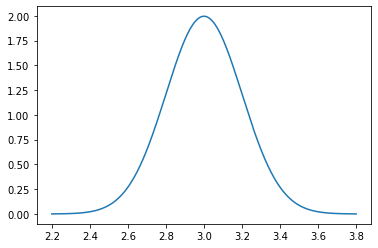

X ~ N(3.0, 0.2)

P(X <= 3.2) =  0.8413447460685431

P(2.8 <= X <= 3.4) =  0.8185946141203639
# babies that weigh between 2.8 and 3.4 kg is  446.13406469559834

P(X < w) = 0.4 for w =  2.94933057937284


In [ ]:
# use scipy.stats.norm()
# Define mu and sigma
mu = 3.0
sigma = 0.2 #in kilograms!
weights_rv = stats.norm(mu, sigma)

# Visualize the distribution
xs = np.linspace(mu-4*sigma, mu+4*sigma, 1000)
plt.figure()
plt.plot(xs, weights_rv.pdf(xs))
plt.show()


# print intro
print(f'X ~ N({mu}, {sigma})')


# What is the probability that a randomly selected baby born at the hospital weighs less than 3.2 kg?
print('\nP(X <= 3.2) = ', weights_rv.cdf(3.2))


# If there were 545 babies born at this hospital last year, estimate the
# number of babies that weighed between 2.8 kg and 3.4 kg
print('\nP(2.8 <= X <= 3.4) = ', weights_rv.cdf(3.4) - weights_rv.cdf(2.8))
print('# babies that weigh between 2.8 and 3.4 kg is ', (weights_rv.cdf(3.4) - weights_rv.cdf(2.8))*545)


#Find the weight w such that 40% of babies weigh less than w
print('\nP(X < w) = 0.4 for w = ', weights_rv.ppf(0.4))

### Example 2: Normal Distribution
The heights of a group of students are normally distributed with a mean of 160 cm and a standard deviation of 20 cm.
* A student is chosen at random. Find the probability that the student’s height is greater than 180 cm.
* In this group of students, 11.9% have heights less than $d$ cm. Find the value of $d$.

In [ ]:
# Define the parameters
mu = 160
sigma = 20

# Define the distribution
heights_rv = stats.norm(mu, sigma)

# print intro
print(f'X ~ N({mu}, {sigma})')


# A student is chosen at random. Find the probability that the student’s height is greater than 180 cm.
print('P(X > 180) = ', 1-heights_rv.cdf(180))

# In this group of students, 11.9% have heights less than d cm. Find the value of d.
print('P(X < d) = 0.119 for d = ', heights_rv.ppf(0.119))

X ~ N(160, 20)
P(X > 180) =  0.15865525393145707
P(X < d) = 0.119 for d =  136.39998919304543


### The Standard Normal Distribution
The **Standard Normal Distribution** $Z$ is the the normal distribution with $\mu =0 $ and $\sigma = 1$:
\begin{equation} Z \sim \mathcal{N}(0, 1) \end{equation}
It can be used as a "unversal comparison tool" between all possible normal distributions via the process called **standardization** (recall $z$-scores from descriptive statistics)

The relationship that scales a random variable $X \sim \mathcal{N}(\mu, \sigma)$ to $Z \sim \mathcal{N}(0, 1)$ is given by
\begin{equation} Z = \frac{X - \mu}{\sigma} \end{equation}
This means that all questions about any normally distributed random variable $X$ can be answered using calculations for the standard normal distribution $Z$. Historically, the statistical tables for normal distribution contained only values about $Z$.

### Example 3
A certain college requires a score of 900 on the GBT test for admission, but it will also accept an equivalent grade on the MRST test. The mean score on the GBT is 1020 and the standard deviation is 140; the mean score on the MRST is 21 and the standard deviation is 4.7. What is the minimum score on the MRST that the college will accept?!

In [ ]:
## Define the normal variables
# G ~ N(1020, 140)
G = stats.norm(1020, 140)

# M ~ N(21, 4.7)
M = stats.norm(21, 4.7)

# Get the cutoff percentile for GBT
cutoff_perc = G.cdf(900)

print(f'GBT acceptance if the score is not in the bottom {np.round(cutoff_perc*100, 2)}%')

# Get the cutoff points for MRST
cutoff_pts = M.ppf(cutoff_perc)
print('The minimum number of points for acceptance on MRST is', np.round(cutoff_pts, 2))

GBT acceptance if the score is not in the bottom 19.57%
The minimum number of points for acceptance on MRST is 16.97


### Example 4
The weight loss, in kilograms, of people using the slimming regime SLIM3M for a period of three months is modelled by a random variable $X$. Experimental data showed that
* 67% of the individuals using SLIM3M lost up to 5 kilograms, and
* 12.4 % lost at least 7 kilograms

Assuming that $X$ follows a Normal distribution, find the mean weight loss of a person who follows the SLIM3M regime for three months.

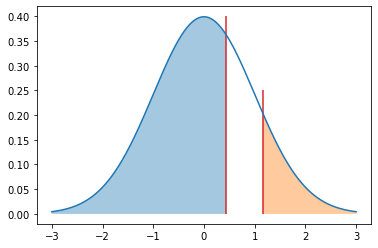

Mean mu =  3.77000295845859
St. dev sigma =  2.79599961428535


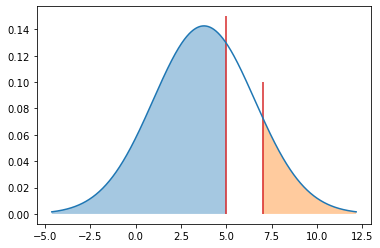

In [ ]:
# Define Z
Z = stats.norm(0, 1)

z1 = Z.ppf(0.67)
z2 = Z.ppf(1 - 0.124)

xs = np.linspace(-3, 3, 1000)
plt.figure()
plt.vlines(z1, ymin=0, ymax=0.4, colors='tab:red')
plt.fill_between(np.linspace(-3, z1), Z.pdf(np.linspace(-3, z1)), alpha=0.4)

plt.vlines(z2, ymin=0, ymax=0.25, colors='tab:red')
plt.fill_between(np.linspace(z2, 3), Z.pdf(np.linspace(z2, 3)), alpha=0.4)
plt.plot(xs, Z.pdf(xs))
plt.show()


mu, sigma = sy.symbols('mu sigma', real=True)
z1 = sy.sympify(z1)
z2 = sy.sympify(z2)

eq_1 = sy.Eq((5 - mu)/sigma, z1)
eq_2 = sy.Eq((7 - mu)/sigma, z2)
sol = mu, sigma = sy.solve((eq_1, eq_2), (mu, sigma))

print('Mean mu = ', sol[mu])
print('St. dev sigma = ', sol[sigma])


# Plot the real situation
mu = 3.77
sigma = 2.796

X = stats.norm(mu, sigma)

lb = mu - 3*sigma
ub = mu + 3*sigma

xs = np.linspace(lb, ub, 1000)
xs_7 = np.linspace(7, ub, 1000)
xs_5 = np.linspace(lb, 5, 1000)

plt.figure()
plt.vlines(5, ymin=0, ymax=0.15, colors='tab:red')
plt.fill_between(xs_5, X.pdf(xs_5), alpha=0.4)

plt.vlines(7, ymin=0, ymax=0.10, colors='tab:red')
plt.fill_between(xs_7, X.pdf(xs_7), alpha=0.4)
plt.plot(xs, X.pdf(xs))
plt.show()

### $\chi^2$ Distirbution (chi-square)
The chi-square distribution appears in the comparison of distributions, in the independence test, and homogeneity test (among others). If $Z_1, Z_2, \ldots, Z_k$ are all standard normal variables independent of one another, then the variable
\begin{equation} \chi_k^2 = Z_1^2 + Z_2^2 + \ldots + Z_k^2 \end{equation}
follows $\chi^2$-distribution with $k$ degrees of freedom


### Example 5
Construct and visualize the $\chi^2$-distributions for $k=1, 2, 3, 4$

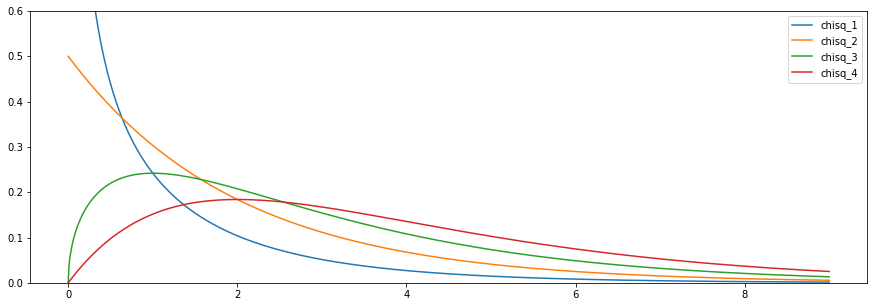

In [ ]:
# Defining chi_1^2, chi_2^2, chi_3^2 and chi_4^2
chisq_1 = stats.chi2(1)
chisq_2 = stats.chi2(2)
chisq_3 = stats.chi2(3)
chisq_4 = stats.chi2(4)

xs = np.linspace(0, 9, 1000)
plt.figure(figsize=(15,5))
plt.plot(xs, chisq_1.pdf(xs), label='chisq_1')
plt.plot(xs, chisq_2.pdf(xs), label='chisq_2')
plt.plot(xs, chisq_3.pdf(xs), label='chisq_3')
plt.plot(xs, chisq_4.pdf(xs), label='chisq_4')
plt.legend()
plt.ylim(0, 0.6)
plt.show()

### Student's $t$ distribution
Student's $t$ distribution appears in the statistical tests related to comparison of means and the ANOVA (ANalysis Of VAriance) framerork. It is key to analyzing symmetic data for fairly small samples.

Let the random variables $Z$ and $\chi_k^2$ be independent, with $Z$ being standard normal and $\chi_k^2$ being a chi-square distribution with $k$ degrees of freedom. Then $t_k$, the $t$ distribution with $k$ degrees of freedom is defined as
\begin{equation}
t_k = \frac{Z}{\sqrt{\left.\chi_k^2 \middle/ k\right.}}
\end{equation}
The $t_k$ distribution is centeded at the zero and has a similar shape to the $Z$ distribution. $t_1$ is farthest from $Z$ and as $k$ increases, $t_k$ grows closer to $Z$. In the limit case: $t_k \to Z$ as $k \to \infty$

### Example 6
Construct and visualize $t_k$ for $k = 1, 5, 10, 40$

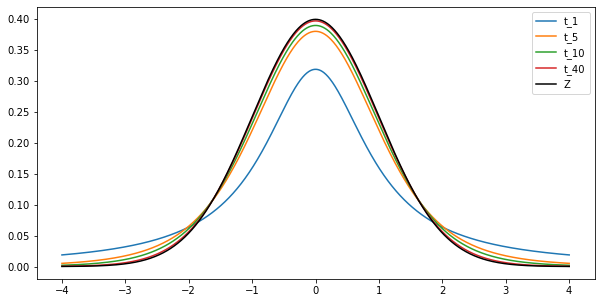

In [ ]:
# Defining t_k
t_1 = stats.t(1)
t_5 = stats.t(5)
t_10 = stats.t(10)
t_40 = stats.t(40)

xs = np.linspace(-4, 4, 1000)
plt.figure(figsize=(10, 5))
plt.plot(xs, t_1.pdf(xs), label = 't_1')
plt.plot(xs, t_5.pdf(xs), label = 't_5')
plt.plot(xs, t_10.pdf(xs), label = 't_10')
plt.plot(xs, t_40.pdf(xs), label = 't_40')
plt.plot(xs, Z.pdf(xs), c='k', label = 'Z')
plt.legend()
plt.show()